# Imported the data

In [2]:
import yfinance as yf
# Get the data for tatamotors
ticker = "INFY.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [39]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility

C:\Users\Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002322. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2054.67
Distribution:                  Normal   AIC:                          -4103.34
Method:            Maximum Likelihood   BIC:                          -4089.52
                                        No. Observations:                  739
Date:                Wed, Jul 24 2024   Df Residuals:                      738
Time:                        16:36:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.8268e-04  6.061e-04      1.126      0.260 

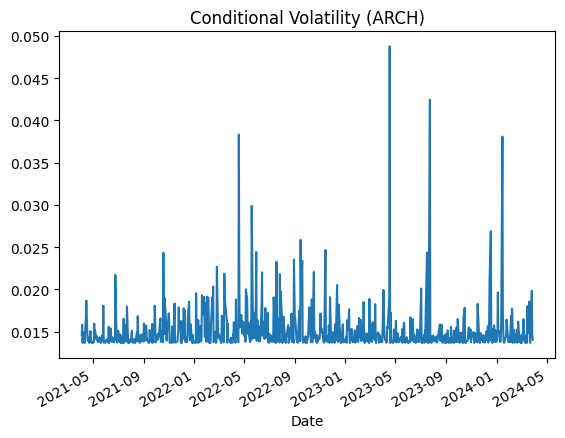

In [57]:
from arch import arch_model
# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

C:\Users\Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002322. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2056.20
Distribution:                  Normal   AIC:                          -4104.40
Method:            Maximum Likelihood   BIC:                          -4085.97
                                        No. Observations:                  739
Date:                Wed, Jul 24 2024   Df Residuals:                      738
Time:                        16:35:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.8374e-04  6.115e-04      1.445      0.148 

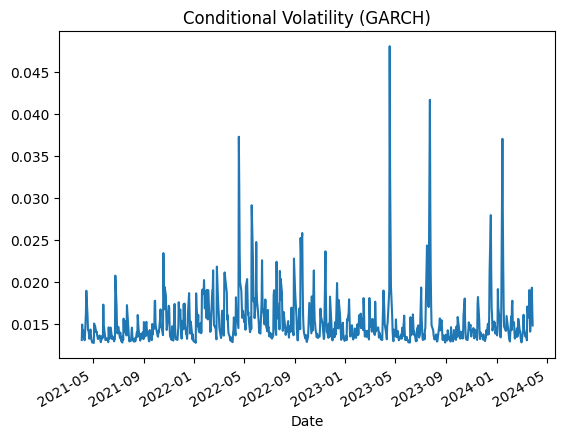

In [56]:
# Fit a GARCH model
garch_model_fit = arch_model(data['Returns'], vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [47]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1342.9354162759928
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1342.9176673853265
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9


In [48]:
forecasts = res.forecast()

In [49]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [51]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-21,1564.000000,1576.949951,1543.400024,1554.699951,1545.986816,11062497,-0.000161
2024-03-22,1521.000000,1528.900024,1498.199951,1508.849976,1500.393799,14673890,-0.029935
2024-03-26,1492.000000,1507.449951,1487.900024,1492.650024,1484.284668,8351081,-0.010795
2024-03-27,1496.000000,1499.000000,1481.550049,1483.849976,1475.533936,6857402,-0.005913
2024-03-28,1487.150024,1511.800049,1487.150024,1498.050049,1489.654419,12499530,0.009524


In [50]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.093024
                 h.1
Date                
2024-03-28  1.979872
                 h.1
Date                
2024-03-28  1.979872


In [52]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01     h.02      h.03      h.04      h.05      h.06  \
Date                                                                    
2024-03-28  1.979872  2.15355  2.260601  2.326584  2.367255  2.392323   

                h.07      h.08     h.09      h.10  ...      h.81      h.82  \
Date                                               ...                       
2024-03-28  2.407775  2.417299  2.42317  2.426788  ...  2.432602  2.432602   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-03-28  2.432602  2.432602  2.432602  2.432602  2.432602  2.432602   

                h.89      h.90  
Date                            
2024-03-28  2.432602  2.432602  

[1 rows x 90 columns]


In [54]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,1.979872,2.15355,2.260601,2.326584,2.367255,2.392323,2.407775,2.417299,2.42317,2.426788,...,2.432602,2.432602,2.432602,2.432602,2.432602,2.432602,2.432602,2.432602,2.432602,2.432602


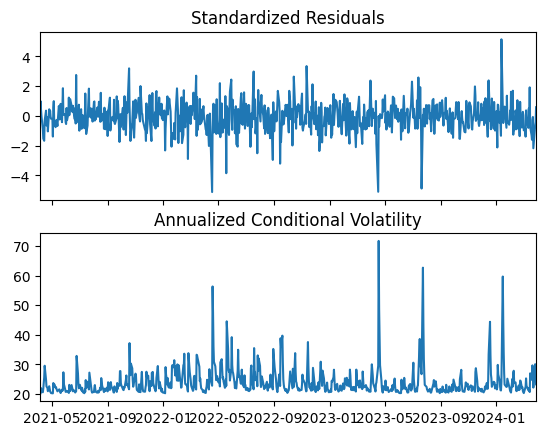

In [58]:
fig = res.plot(annualize="D")